COCO API 설치가 살짝 복잡했음 (window)  
git, visual studio c++ compiler 환경 필요  
pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI

In [1]:
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

annotation file을 COCO객체로 로드하면 다양한 COCO객체 API로 COCO dataset 활용 가능

In [2]:
data_dir = 'D:/jupyter_dir/DLCV/data/coco'
data_type = 'val2017'
annFile = '{}/annotations_trainval2017/annotations/instances_{}.json'.format(data_dir, data_type)
coco = COCO(annFile)

loading annotations into memory...
Done (t=1.46s)
creating index...
index created!


#### Category 정보를 가져오기

In [4]:
# getCatIds()는 COCO Dataset의 id를 list로 반환
print(coco.getCatIds())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]


In [5]:
# loadCats() caategory id리스트를 입력받아ㅏ category들에 대한 세부 정보를 여러개의 딕셔너리를 개별 원소로 가지는 리스트로 반환
cats = coco.loadCats(coco.getCatIds())
cats

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [7]:
# display COCO categories anc supercategories
nms = [cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats]) # 중복제거
print('COCO supercategories:\n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories:
sports food appliance vehicle furniture indoor accessory animal electronic kitchen outdoor person


## 지정 이미지 dataset에서 load

In [8]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person', 'dog', 'skateboard'])
print(catIds)
imgIds = coco.getImgIds(catIds=catIds)
print(imgIds)

[1, 18, 41]
[549220, 324158, 279278]


In [9]:
# loadImgs() : 인자로 들어온 image id에 대한 메타 정보를 딕셔너리를 개별 원소로 가지는 리스트로 return
img = coco.loadImgs(324158)
print(img)

[{'license': 1, 'file_name': '000000324158.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg', 'height': 334, 'width': 500, 'date_captured': '2013-11-19 23:54:06', 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg', 'id': 324158}]


In [11]:
# 전체 리스트가 아닌 내부 dictionary만 필요하기 때문에 
img = coco.loadImgs(324158)[0]
print(img)

{'license': 1, 'file_name': '000000324158.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg', 'height': 334, 'width': 500, 'date_captured': '2013-11-19 23:54:06', 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg', 'id': 324158}


#### 이미지 위치 수동 지정, 시각화

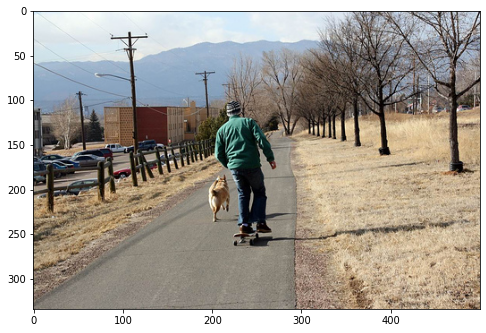

In [16]:
import cv2
import matplotlib.pyplot as plt
import pylab # pylab은 pyplot과 numpy를 하나의 namespace에 import하는데 편리하지만 namespace오염시킬 우려가 커 사용을 권장하지 않음
%matplotlib inline

img_file_path = '{}/val2017/val2017/{}'.format(data_dir, img['file_name'])

img_array = cv2.imread(img_file_path)
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 10))
#plt.axis('off')
plt.imshow(img_array)
plt.show()

## Instance Segmentation 시각화

In [17]:
# 해당 image annotation 가져오기 위해 getAnnIds()이용
# 인자로 image의 id(파일명x)와 category id 입력
# 하나의 이미지는 segmentation별로 여러개의 annotation을 가질 수 있습니다.

# id가 img['id']인 이미지에서 카테고리 아이디가 catIds에 속하는 것들의 annotation파일의 id
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
annIds

[10673, 638724, 2162813]

In [18]:
# loadAnns()에 annotation id를 리스트로 입력하면 annotation 정보들을 반환함. 
anns = coco.loadAnns(annIds)
anns

[{'segmentation': [[216.7,
    211.89,
    216.16,
    217.81,
    215.89,
    220.77,
    215.89,
    223.73,
    217.77,
    225.35,
    219.12,
    224.54,
    219.12,
    220.5,
    219.66,
    217.27,
    219.93,
    212.7,
    220.46,
    207.85,
    219.66,
    203.01,
    218.85,
    198.43,
    217.77,
    195.74,
    216.7,
    194.93,
    215.62,
    190.62,
    215.62,
    186.59,
    214.27,
    183.89,
    211.85,
    184.16,
    211.85,
    187.66,
    210.24,
    187.66,
    209.16,
    184.97,
    207.81,
    183.36,
    205.12,
    186.59,
    205.12,
    189.28,
    201.08,
    192.78,
    199.74,
    195.2,
    196.78,
    200.04,
    196.51,
    203.01,
    198.12,
    205.43,
    197.32,
    209.2,
    196.78,
    213.23,
    197.05,
    218.89,
    199.74,
    221.85,
    201.62,
    225.35,
    201.62,
    233.69,
    201.08,
    236.11,
    202.97,
    236.38,
    204.85,
    236.11,
    204.58,
    232.34,
    203.78,
    228.85,
    205.39,
    233.15,
    20

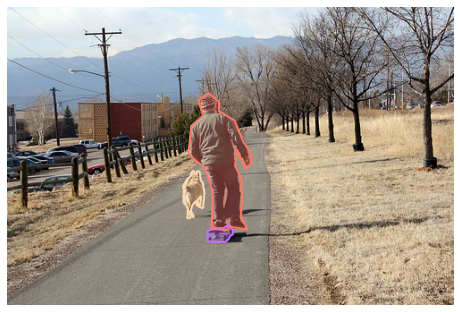

In [20]:
# showAnn()은 annotation정보들을 입력받아 Visualization시켜줌
# 단, matplotlib객체로 원본이미지가 먼저 load되어 있어야
plt.figure(figsize=(8, 10))
plt.imshow(img_array)
plt.axis('off')
coco.showAnns(anns)

## Bounding Box는 COCOAPI에서 지원하지 않기 떄문에 Customize해야합니다  
annotation에 bbox정보 있음

In [22]:
# bounding box 위한 x, y좌표 segmentation별 추출
anns_bbox = [ann['bbox'] for ann in anns]
print(anns_bbox)

[[196.51, 183.36, 23.95, 53.02], [223.48, 243.72, 28.67, 19.61], [202.71, 96.55, 71.78, 153.14]]


(-0.5, 499.5, 333.5, -0.5)

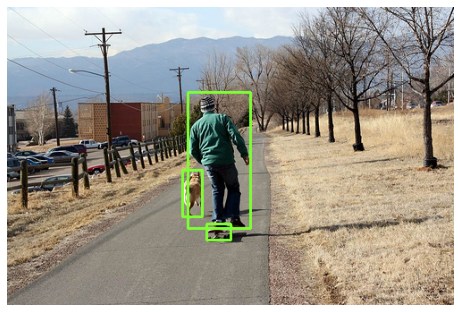

In [25]:
image_array = cv2.imread(img_file_path)
image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

for ann_bbox in anns_bbox:
    ann_bbox = map(int, ann_bbox)
    
#     start_x = ann_bbox[0]
#     start_y = ann_bbox[1]
#     right = ann_bbox[0] + ann_bbox[2]
#     bottom = ann_bbox[1] + ann_bbox[3]
#     cv2.rectangle(image_array, (int(start_x), int(start_y)), (int(right), int(bottom)), (125, 255, 51), thickness=2)
    
    pose = tuple(ann_bbox)
    cv2.rectangle(image_array, pose, (125, 255, 51), thickness=2)
    
plt.figure(figsize=(8, 10))
plt.imshow(image_array)
plt.axis('off')

bbox 위에 category 명 시각화

In [26]:
cats = coco.loadCats([ann['category_id'] for ann in anns])
print(cats)
category_names = [cat['name'] for cat in cats]
print(category_names)

[{'supercategory': 'animal', 'id': 18, 'name': 'dog'}, {'supercategory': 'sports', 'id': 41, 'name': 'skateboard'}, {'supercategory': 'person', 'id': 1, 'name': 'person'}]
['dog', 'skateboard', 'person']


(-0.5, 499.5, 333.5, -0.5)

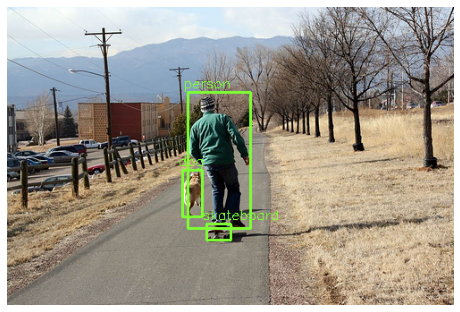

In [33]:
image_array = cv2.imread(img_file_path)
image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)

for ann in anns:
    ann_bbox = list(map(int, ann['bbox']))
    ann_category_id = ann['category_id']
    
    pose = tuple(ann_bbox)
    cv2.rectangle(image_array, pose, (125, 255, 51), thickness=2)
    
    category = coco.loadCats(ann_category_id)[0]
    category_name = category['name']
    cv2.putText(image_array, category_name, (ann_bbox[0]-5, ann_bbox[1]-5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (125, 255, 51), 1)
    
plt.figure(figsize=(8, 10))
plt.imshow(image_array)
plt.axis('off')